# Use DESI Legacy Survey photo z



In [1]:
import pandas as pd
from astropy.table import Table, Column, vstack
from astropy.cosmology import Planck15
import astropy.units as u
from astropy.coordinates import SkyCoord
from astropy.io import ascii

import urllib.request, json 

import time
import numpy as np
import pyvo as vo
%matplotlib inline
#%config InlineBackend.figure_format = 'svg'
import matplotlib as mpl
import matplotlib.pyplot as plt

from selenium import webdriver

from herschelhelp_internal.masterlist import merge_catalogues, nb_merge_dist_plot
from herschelhelp.utils import clean_table

/Users/rs548/anaconda/envs/herschelhelp_internal/lib/python3.6/site-packages/seaborn/apionly.py:9: UserWarning: As seaborn no longer sets a default style on import, the seaborn.apionly module is deprecated. It will be removed in a future version.
  warnings.warn(msg, UserWarning)


## 2. Cross match to desi-photoz objects

In [2]:
cross_query = """
SELECT
    db.ID,
    db.RA,
    db.DEC,
    db.field,
    db.photo_z,
    db.photo_zerr
FROM desi_photoz.main AS db
WHERE db.field = 'xFLS'
"""

# construct a service; I’ve taken the URL from TOPCAT’s
# TAP service browser # ("Selected TAP Service" near the
# foot of the dialog)
service = vo.dal.TAPService(
    "https://herschel-vos.phys.sussex.ac.uk/__system__/tap/run/tap"
)

In [3]:
job = service.submit_job(cross_query)
job.run()
job_url = job.url
job_result = vo.dal.tap.AsyncTAPJob(job_url)
start_time = time.time()
wait = 5.
while job.phase == 'EXECUTING':
    
    time.sleep(wait) #wait and try again
    #wait *= 2

print('Job {} running after {} seconds.'.format(job.phase, round(time.time() - start_time)))

result = job_result.fetch_result()
desi_photoz = result.table

Job COMPLETED running after 6 seconds.


In [4]:
desi_photoz = clean_table(desi_photoz)

Converting column id type from object to string
Converting column field type from object to string


In [5]:
desi_photoz.write('./data/xFLS_DESI-DR7_Zou_et_al_2019_photo_z.fits', overwrite=True)

In [6]:
desi_photoz

id,ra,dec,field,photo_z,photo_zerr
,deg,deg,,,
str16,float64,float64,str4,float64,float64
6000611704001982,261.382817838785,57.9962796395365,xFLS,0.33817443,0.017848536
6000611704002016,261.376526485794,57.9989368700766,xFLS,0.68625134,0.1327155
6000611704002015,261.375239361985,57.9977106999728,xFLS,0.3545674,0.07556344
6000611704002390,261.38912816096,58.0220231513563,xFLS,0.52487946,0.15016602
6000611704002458,261.390080118927,58.0266581587461,xFLS,0.68780094,0.058417957
6000611704002156,261.372148357715,58.0075256615317,xFLS,0.5403842,0.029961828
6000611704002158,261.371454781765,58.0088503493568,xFLS,0.5139919,0.13940623
6000611704002198,261.378094098632,58.0125932431422,xFLS,0.3059388,0.052124485


In [7]:
ml = Table.read('../../dmu1/dmu1_ml_xFLS/data/master_catalogue_xfls_20180501.fits')

In [8]:
ml

help_id,field,ra,dec,hp_idx,f_ap_wfc_u,ferr_ap_wfc_u,m_ap_wfc_u,merr_ap_wfc_u,f_wfc_u,ferr_wfc_u,m_wfc_u,merr_wfc_u,flag_wfc_u,f_ap_wfc_g,ferr_ap_wfc_g,m_ap_wfc_g,merr_ap_wfc_g,f_wfc_g,ferr_wfc_g,m_wfc_g,merr_wfc_g,flag_wfc_g,f_ap_wfc_r,ferr_ap_wfc_r,m_ap_wfc_r,merr_ap_wfc_r,f_wfc_r,ferr_wfc_r,m_wfc_r,merr_wfc_r,flag_wfc_r,f_ap_wfc_i,ferr_ap_wfc_i,m_ap_wfc_i,merr_ap_wfc_i,f_wfc_i,ferr_wfc_i,m_wfc_i,merr_wfc_i,flag_wfc_i,f_ap_wfc_z,ferr_ap_wfc_z,m_ap_wfc_z,merr_ap_wfc_z,f_wfc_z,ferr_wfc_z,m_wfc_z,merr_wfc_z,flag_wfc_z,f_ap_gpc1_g,ferr_ap_gpc1_g,m_ap_gpc1_g,merr_ap_gpc1_g,f_gpc1_g,ferr_gpc1_g,m_gpc1_g,merr_gpc1_g,flag_gpc1_g,f_ap_gpc1_r,ferr_ap_gpc1_r,m_ap_gpc1_r,merr_ap_gpc1_r,f_gpc1_r,ferr_gpc1_r,m_gpc1_r,merr_gpc1_r,flag_gpc1_r,f_ap_gpc1_i,ferr_ap_gpc1_i,m_ap_gpc1_i,merr_ap_gpc1_i,f_gpc1_i,ferr_gpc1_i,m_gpc1_i,merr_gpc1_i,flag_gpc1_i,f_ap_gpc1_z,ferr_ap_gpc1_z,m_ap_gpc1_z,merr_ap_gpc1_z,f_gpc1_z,ferr_gpc1_z,m_gpc1_z,merr_gpc1_z,flag_gpc1_z,f_ap_gpc1_y,ferr_ap_gpc1_y,m_ap_gpc1_y,merr_ap_gpc1_y,f_gpc1_y,ferr_gpc1_y,m_gpc1_y,merr_gpc1_y,flag_gpc1_y,f_ap_90prime_g,ferr_ap_90prime_g,m_ap_90prime_g,merr_ap_90prime_g,f_90prime_g,ferr_90prime_g,m_90prime_g,merr_90prime_g,flag_90prime_g,f_ap_90prime_r,ferr_ap_90prime_r,m_ap_90prime_r,merr_ap_90prime_r,f_90prime_r,ferr_90prime_r,m_90prime_r,merr_90prime_r,flag_90prime_r,f_ap_mosaic_z,ferr_ap_mosaic_z,m_ap_mosaic_z,merr_ap_mosaic_z,f_mosaic_z,ferr_mosaic_z,m_mosaic_z,merr_mosaic_z,flag_mosaic_z,f_ap_mosaic_r,ferr_ap_mosaic_r,m_ap_mosaic_r,merr_ap_mosaic_r,f_mosaic_r,ferr_mosaic_r,m_mosaic_r,merr_mosaic_r,flag_mosaic_r,f_ap_ukidss_j,ferr_ap_ukidss_j,m_ap_ukidss_j,merr_ap_ukidss_j,f_ukidss_j,ferr_ukidss_j,m_ukidss_j,merr_ukidss_j,flag_ukidss_j,f_ap_irac_i1,ferr_ap_irac_i1,m_ap_irac_i1,merr_ap_irac_i1,f_irac_i1,ferr_irac_i1,m_irac_i1,merr_irac_i1,flag_irac_i1,f_ap_irac_i2,ferr_ap_irac_i2,m_ap_irac_i2,merr_ap_irac_i2,f_irac_i2,ferr_irac_i2,m_irac_i2,merr_irac_i2,flag_irac_i2,f_ap_irac_i3,ferr_ap_irac_i3,m_ap_irac_i3,merr_ap_irac_i3,f_irac_i3,ferr_irac_i3,m_irac_i3,merr_irac_i3,flag_irac_i3,f_ap_irac_i4,ferr_ap_irac_i4,m_ap_irac_i4,merr_ap_irac_i4,f_irac_i4,ferr_irac_i4,m_irac_i4,merr_irac_i4,flag_irac_i4,stellarity,stellarity_origin,flag_cleaned,flag_merged,flag_gaia,flag_optnir_obs,flag_optnir_det,zspec,zspec_qual,zspec_association_flag,ebv
,,deg,deg,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,uJy,uJy,,,,,,,,uJy,uJy,,,,,,,,uJy,uJy,,,,,,mag,mag,,,mag,mag,,,,,,,,,,,uJy,uJy,,,uJy,uJy,,,,uJy,uJy,,,uJy,uJy,,,,uJy,uJy,,,uJy,uJy,,,,uJy,uJy,,,uJy,uJy,,,,,,,,,,,,,,
bytes27,bytes18,float64,float64,int64,float32,float32,float32,float32,float32,float32,float32,float32,bool,float32,float32,float32,float32,float32,float32,float32,float32,bool,float32,float32,float32,float32,float32,float64,float32,float64,bool,float32,float32,float32,float32,float32,float64,float32,float64,bool,float32,float32,float32,float32,float32,float32,float32,float32,bool,float64,float64,float64,float64,float64,float64,float64,float64,bool,float64,float64,float64,float64,float64,float64,float64,float64,bool,float64,float64,float64,float64,float64,float64,float64,float64,bool,float64,float64,float64,float64,float64,float64,float64,float64,bool,float64,float64,float64,float64,float64,float64,float64,float64,bool,float32,float32,float32,float32,float32,float32,float32,float32,bool,float32,float32,float32,float32,float32,float32,float32,float32,bool,float32,float32,float32,float32,float32,float32,float32,float32,bool,float32,float32,float32,float32,float32,float32,float32,float32,bool,float32,float32,float32,float32,float32,float32,float32,float32,bool,float64,float64,float64,float64,float64,float64,float64,float64,bool,float64,float64,float64,float64,float64,float64,float64,float64,bool,float64,float64,float64,float64,float64,float64,float64,float64,bool,float64,float64,float64,float64,float64,float64,float64,float64,bool,float32,bytes20,bool,bool,int64,int64,int64,float64,int64,boo

/Users/rs548/anaconda/envs/herschelhelp_internal/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


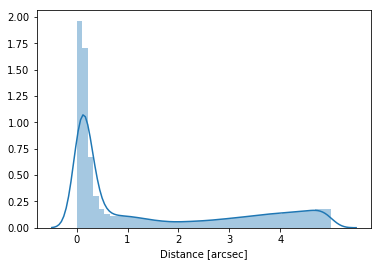

In [9]:
nb_merge_dist_plot(
    SkyCoord(ml['ra'], ml['dec']),
    SkyCoord(desi_photoz['ra'], desi_photoz['dec'])
)

In [10]:
# Given the graph above, we use 0.8 arc-second radius
desi_photoz['ra'].name = 'desi_ra'
desi_photoz['dec'].name = 'desi_dec'
photoz = merge_catalogues(ml, desi_photoz, "desi_ra", "desi_dec", radius=0.8*u.arcsec)

In [25]:
photoz['help_id'].fill_value = ''
photoz['photo_z'].fill_value = np.nan
photoz = photoz.filled()
has_help = photoz['help_id'] != ''
has_z = ~np.isnan(photoz['photo_z'])
photoz = photoz[has_help & has_z]
photoz.meta = None
photoz['help_id', 'id', 'ra', 'dec', 'photo_z', 'photo_zerr'].write('./data/xFLS_DESI-DR7_Zou_et_al_2019_photo_z_withhelp_id.fits', overwrite=True)

In [26]:
photoz


help_id,id,ra,dec,photo_z,photo_zerr
,,deg,deg,,
bytes27,str16,float64,float64,float64,float64
HELP_J170626.324+590423.043,6000614713003284,256.609682112679,59.0730674737803,0.31536967,0.023947578
HELP_J172514.094+580451.789,6000611704003364,261.308726742679,58.0810525337803,0.61404544,0.032785732
HELP_J170431.405+585753.893,6000614712001611,256.13085530267904,58.9649701737803,0.4674209,0.085915804
HELP_J170811.026+585534.412,6000614714000741,257.045940442679,58.9262254337803,0.24395078,0.016914459
HELP_J172401.299+580445.122,6000611703003245,261.00541046267904,58.0792006037803,0.33172032,0.09115302
HELP_J171923.378+583333.386,6000613221002962,259.84740781509,58.5592737957439,0.7280848,0.14990416
HELP_J170907.079+581531.374,6000612458001965,257.279495122679,58.2587149037803,0.435786,0.02429404
HELP_J170511.015+584341.783,6000613965001576,256.2958952276554,58.72827318371857,0.76796037,0.18461767
